   # Exploratory Data Analysis - Mini Project:

## Data Preprocessing:

1.Import the necessary libraries and read the data.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [25]:
fifa = pd.read_csv('fifa.csv')

In [26]:
fifa.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [27]:
fifa_VI = pd.read_csv('fifa_ variable_information.csv')

In [5]:
fifa_VI.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


2.Drop any columns that you deem unecessary for analysis.

In [6]:
df = (fifa.isnull().sum()/len(fifa))*100

In [7]:
df[df>85].index

Index(['Loaned From'], dtype='object')

In [8]:
fifa.drop(columns=['Loaned From'],inplace=True)

In [9]:
fifa.drop(columns=['Photo','Flag','Club Logo','Skill Moves','Body Type','Jersey Number'],inplace=True)

In [10]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Position                  18147 non-null  object 
 14  Joined

### Comment: In the data set fifa the variable Loaned From have more than 85% null values, So we can drop that column.

3.The following columns need to be converted for further analysis:

a) 'Value' - Convert to Float after getting rid of currency symbol and suffix.

In [11]:
def convert_value(Value):
    
    if Value==np.nan:
        new_value=float(0)
    else:
        Value=Value.replace('€','')
        if Value[-1]=='K':
            new_value=float(Value.replace('K',''))*1000
        else:
            new_value=float(Value.replace('M',''))*1000000
    return new_value

In [12]:
fifa['Value']= fifa['Value'].apply(lambda x : convert_value(x))

In [13]:
fifa['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

b) 'Wage' - Convert to Float after getting rid of currency symbol and suffix.    

In [14]:
def convert_Wage(Wage):
    
    if Wage==np.nan:
        new_wage=float(0)
    else:
        Wage=Wage.replace('€','')
        if Wage[-1]=='K':
            new_wage=float(Wage.replace('K',''))*1000
        else:
            new_wage=float(Wage.replace('M',''))*1000000
    return new_wage        

In [15]:
fifa['Wage'] = fifa['Wage'].apply(lambda x : convert_Wage(x))

In [16]:
fifa['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

c) 'Joined' - 'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year.

In [17]:
fifa['Joined'] = pd.to_datetime(fifa['Joined'],format='%b %d, %Y').apply(lambda x: x.year).fillna(0).astype(int)

In [18]:
fifa['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

d) 'Contract Valid Until' -  Date as a string ,Convert to datetime type.

In [19]:
fifa[ 'Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

e) 'Height' - In inches with a quotation mark, Convert to Float with decimal points.

In [20]:
def height_convert(x):
    if x is not None:
        return float(str(x).replace("'",'.'))

In [23]:
fifa['Height'] = fifa['Height'].apply(height_convert)
fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

f) 'Weight' - Contains the suffix lbs, Remove the suffix and convert to float.

In [22]:
fifa['Weight'] = fifa['Weight'].fillna('0').apply(lambda x: x.replace('lbs','')).astype(float)

In [181]:
fifa['Release Clause']=fifa['Release Clause'].fillna('0').apply(lambda x : convert_Wage(x))

In [182]:
fifa['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

 4) Check for missing values and do a mean imputation where necessary.

In [183]:
# Count of the null values for all the variables:

null = fifa.isnull().sum()

In [184]:
# These are the index of both categorical columns as well as numerical columns having null values.

index = [i  for i in null[null>0].index]

In [185]:
# These are only numerical_columns having null values.

numerical_columns = [i     for i in index      if i in fifa.columns and  fifa[i].dtype!=object]

In [186]:
# Filling the null values of the numerical columns with mean computation.

for columns in numerical_columns:
    fifa[columns]=fifa[columns].fillna(fifa[columns].mean())

In [187]:
# checking is there null values still for numerical columns.

fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Preferred Foot               48
International Reputation      0
Weak Foot                     0
Work Rate                    48
Position                     60
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSpeed                   0
Agility                       0
Reaction

# Exploratory Analysis:

1)	Plot the distribution of Overall rating for all players. 

Text(0.5, 1.0, 'Denisty plot for Overall rating for all players')

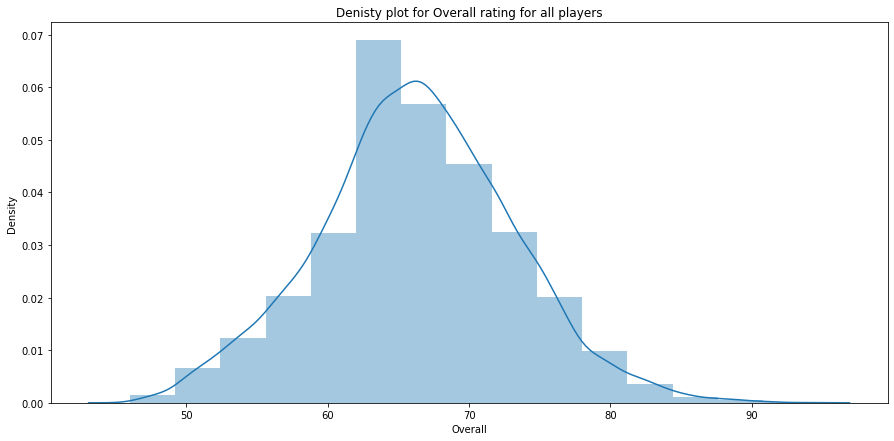

In [188]:
plt.figure(figsize=(15,7))
sns.distplot(fifa['Overall'],bins=15)
plt.title('Denisty plot for Overall rating for all players')

Text(0.5, 1.0, 'Box plot for Overall rating for all players')

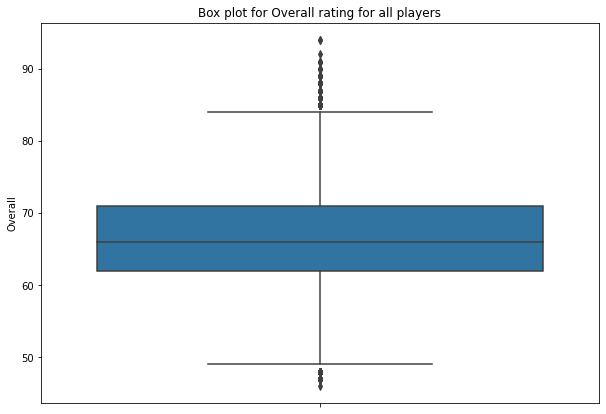

In [189]:
plt.figure(figsize=(10,7))
sns.boxplot(y=fifa['Overall'])
plt.title('Box plot for Overall rating for all players')

2)	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [190]:
columns = ['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']

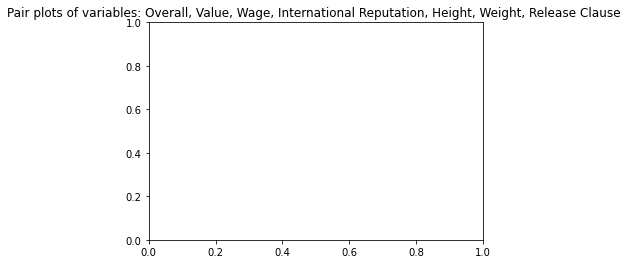

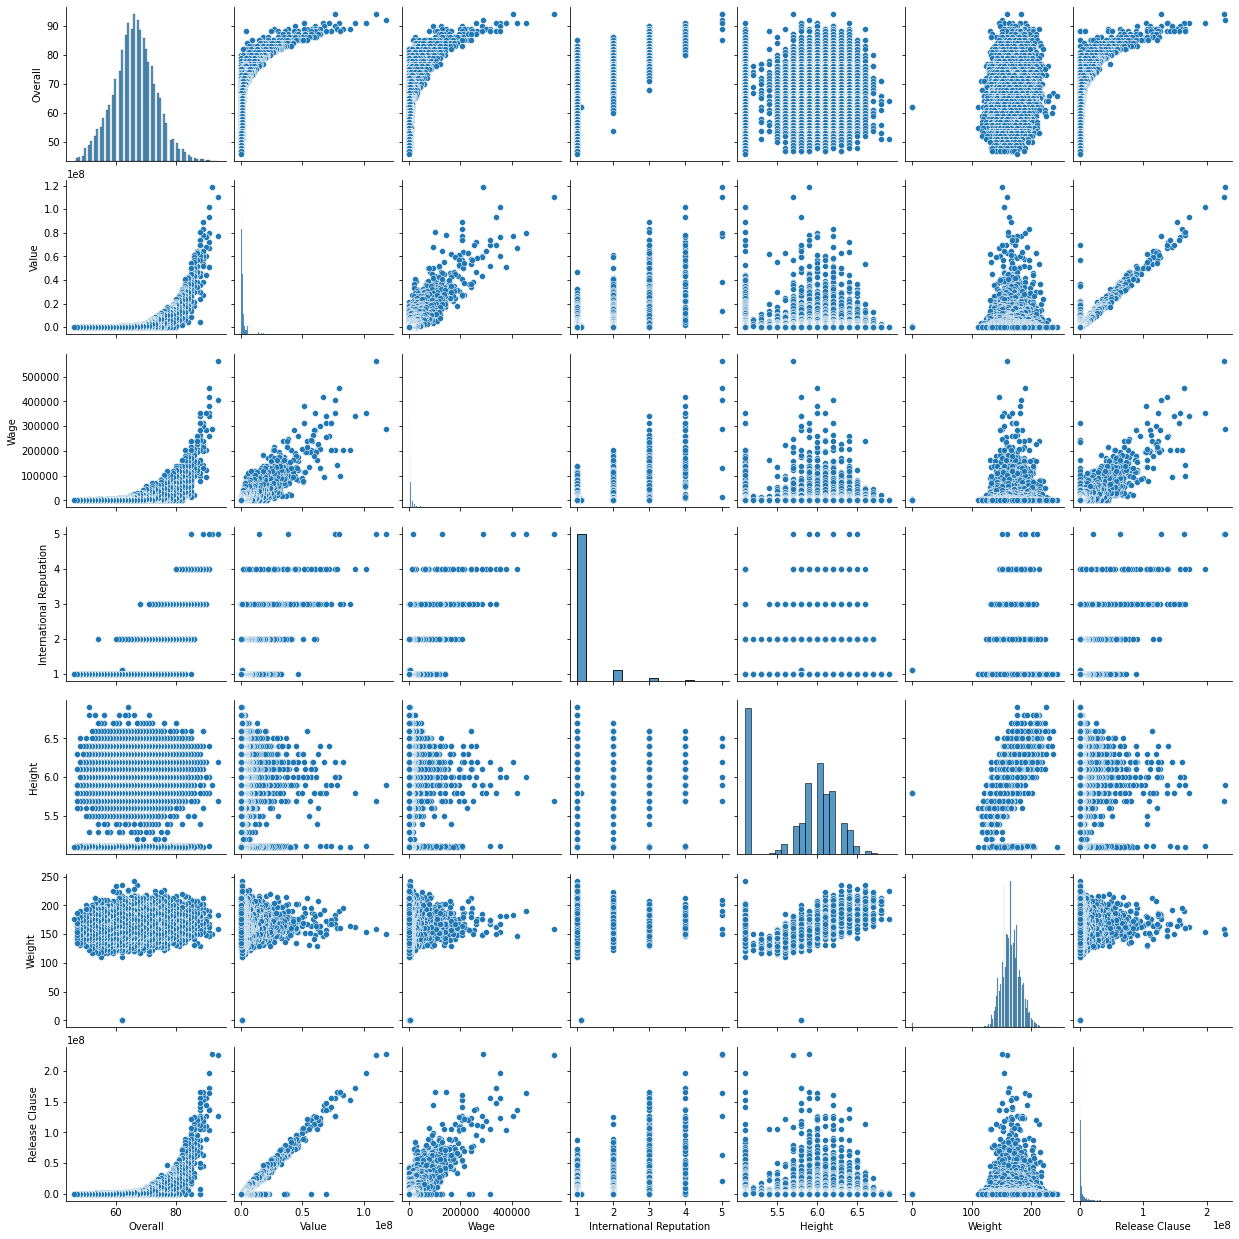

In [227]:
plt.title('Pair plots of variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause ')
sns.pairplot(fifa[columns])


In [192]:
fifa[columns].corr()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
Overall,1.000000,0.627085,0.571926,0.499243,0.040774,0.150751,0.589200
Value,0.627085,1.000000,0.858442,0.653059,0.013171,0.049370,0.967255
Wage,0.571926,0.858442,1.000000,0.668515,0.023286,0.065846,0.820162
International Reputation,0.499243,0.653059,0.668515,1.000000,0.028510,0.077518,0.617969
Height,0.040774,0.013171,0.023286,0.028510,1.000000,0.396219,0.010948
Weight,0.150751,0.049370,0.065846,0.077518,0.396219,1.000000,0.043023
Release Clause,0.589200,0.967255,0.820162,0.617969,0.010948,0.043023,1.000000


3)	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [193]:
# These are the players having contract expiring in 2020.

Valid_20 = fifa[fifa['Contract Valid Until']=='2020-01-01']

In [194]:
# In this code ranking the players whose contract expiring in 2020 by having overall score highest with dense rank.

Valid_20['Rank']=Valid_20['Overall'].rank(method='dense',ascending=False)

In [196]:
# In this code creating top 20 players by sorting above code with rank ascending and value descending.

Top_20_Players = Valid_20.sort_values(['Rank', 'Value'],ascending=([True, False])).head(20)

In [146]:
# Theses are the top 20 players bases on overall score and contract expiring in 2020

Top_20_Players

a)	What would the average wage for this set of players be?

In [197]:
print('The average wage of the top 20 players is : €',Top_20_Players['Wage'].mean())

The average wage of the top 20 players is : € 205150.0


<AxesSubplot:xlabel='Name'>

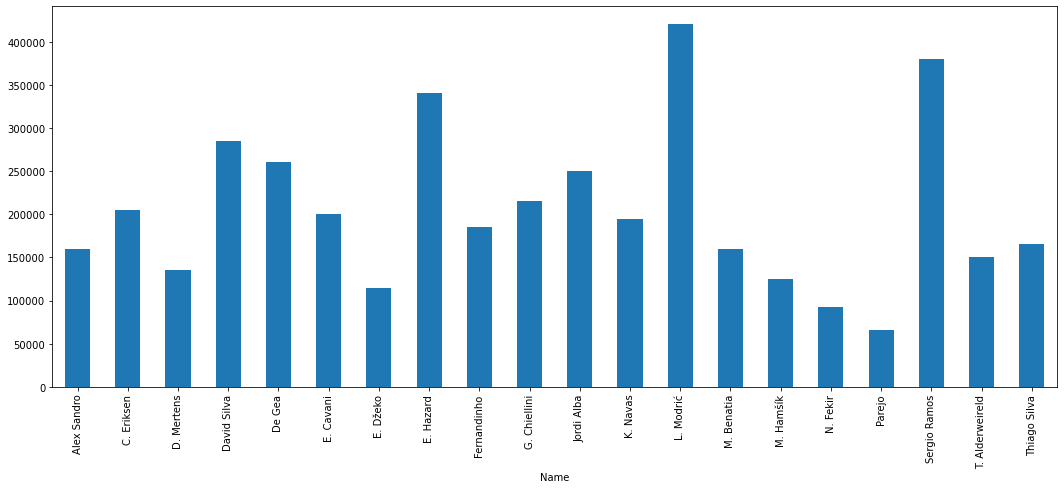

In [198]:
plt.figure(figsize=(18,7))
Top_20_Players.groupby('Name')['Wage'].mean().plot(kind='bar')

In [235]:
Top_20_Players['Name']

5           E. Hazard
3              De Gea
6           L. Modrić
8        Sergio Ramos
13        David Silva
21          E. Cavani
24       G. Chiellini
31         C. Eriksen
39       Thiago Silva
52          M. Hamšík
50         D. Mertens
49         Jordi Alba
46           K. Navas
71    T. Alderweireld
64        Alex Sandro
73         M. Benatia
75        Fernandinho
80           N. Fekir
90             Parejo
98           E. Džeko
Name: Name, dtype: object

b)	What is the average age?

In [199]:
print('The average age of the top 20 players is:',Top_20_Players['Age'].mean(),'years')

The average age of the top 20 players is: 29.95 years


c)	Is there a correlation between the Overall rating and Value for these players?

Text(0.5, 1.0, 'Scatter plot of overall ratings vs value of the players')

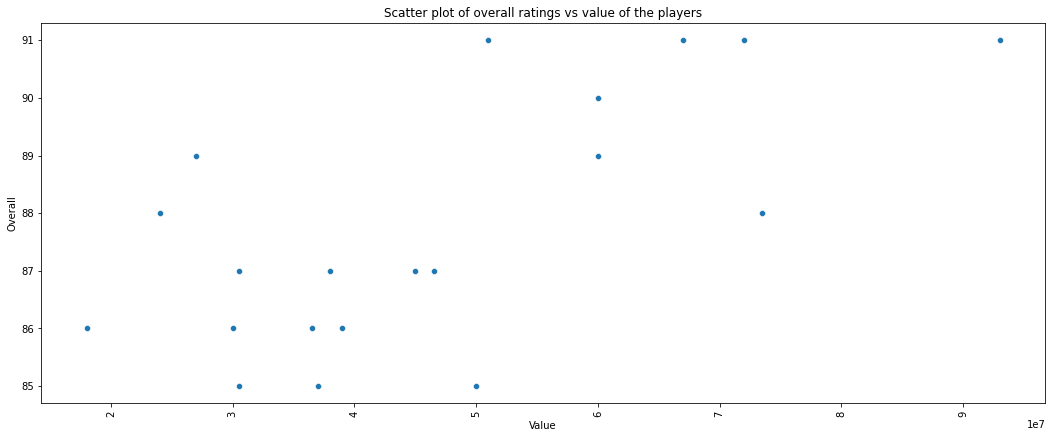

In [200]:
plt.figure(figsize=(18,7))
sns.scatterplot(Top_20_Players['Value'],Top_20_Players['Overall'])
plt.xticks(rotation=90)
plt.title('Scatter plot of overall ratings vs value of the players')

### Comment: There is a weak positive correlation between the overall rating and the value for these players

In [201]:
Top_20_Players[['Value','Overall']].corr()

,Value,Overall
Value,1.000000,0.666788
Overall,0.666788,1.000000


4)	Generate tables containing the top 5 players by Overall rating for each unique position.

In [202]:
Top_5 = fifa.groupby(['Position']).apply(lambda x : x.sort_values('Overall',ascending=False).head(5))

a)	Are there any players appearing in more than one Table. Please point out such players.

In [203]:
# checking is there any duplicates.

Top_5['Name'].duplicated().sum()

0

b)	What is the average wage one can expect to pay for the top 5 in every position?


In [206]:
average_wage = Top_5['Wage'].groupby('Position').apply(np.mean)

Text(0.5, 1.0, 'Bar plot of Position of players vs average wages')

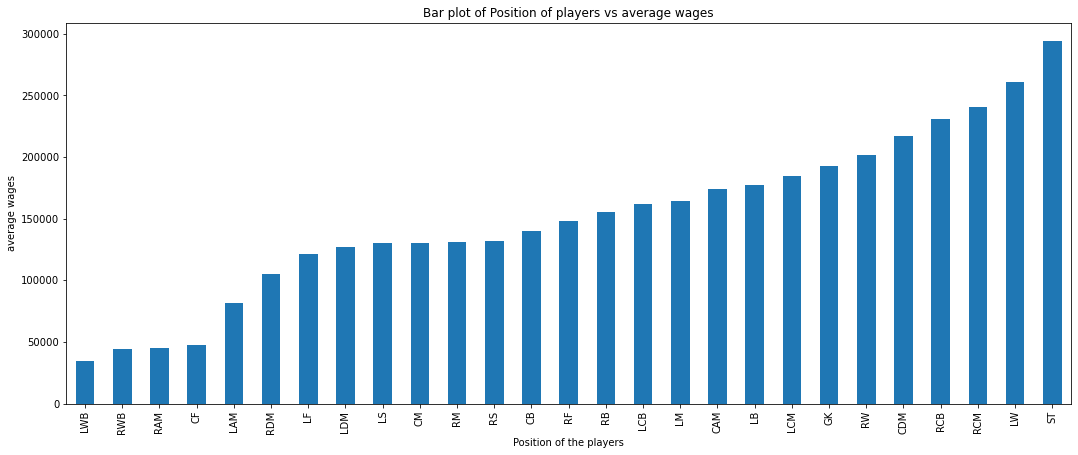

In [217]:
plt.figure(figsize=(18,7))
average_wage.sort_values().plot(kind='bar')
plt.xlabel('Position of the players')
plt.ylabel('average wages')
plt.title('Bar plot of Position of players vs average wages')